## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [72]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection, preprocessing, metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [47]:
train_0 = pd.read_csv('train.csv', sep = ',', encoding = 'latin-1')
test = pd.read_csv('test.csv', sep = ',', encoding = 'latin-1')

In [179]:
train_0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
test_img = np.resize(test, (test.shape[0], 28, 28))

In [50]:
train = train_0.drop('label', axis = 1)
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# model PCA 

In [51]:
pca = PCA(n_components = 9)
train_PCA = pd.DataFrame(pca.fit_transform(train.drop(train.std()[train.std() == 0.0].index.values, axis = 1)),  
                         columns = ["PCA "+str(i) for i in range(1,10)])
train_PCA.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9
0,-661.595853,-699.311330,183.281910,120.609105,-81.088773,489.470193,-683.333139,85.616657,348.473912
1,1701.451793,-360.551315,-501.805145,335.425024,-442.369789,738.381335,653.762276,-176.509288,-7.200874
2,-886.894414,-293.765856,67.155563,78.262244,-473.716119,-323.539584,437.871290,-305.286297,-195.246305
3,-165.755489,300.182930,-64.143933,759.699428,-425.849241,157.367385,-303.915084,277.038820,-45.170172
4,1923.709722,-449.153015,-548.613194,188.559923,-651.727981,990.066306,564.318163,-256.258484,124.669260


In [66]:
train_PCA['Label'] = train_0['label']
train_PCA['Label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [67]:
test_pca = pd.DataFrame(pca.fit_transform(test.drop(test.std()[test.std() == 0.0].index.values, axis = 1)),  
                        columns = ["PCA "+str(i) for i in range(1,10)])
test_pca.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9
0,842.929547,144.674164,743.121453,672.579909,386.216576,489.463895,205.316647,85.431204,-314.756950
1,1142.704679,72.916284,252.571052,-63.404108,-935.431162,446.610772,735.028800,-243.539392,432.046309
2,-498.188718,-134.483319,173.832446,-77.576280,-169.235384,135.468206,-329.247895,-342.778095,-283.449598
3,-234.078467,-611.345768,475.776460,426.098845,-201.592785,159.125276,-78.154055,121.184986,-104.865418
4,-122.664915,708.878253,2.083527,153.180149,291.851582,46.307113,69.012962,739.723952,-307.187913


In [23]:
# kNN Classifier

In [68]:
X_KNN = train_PCA.iloc[:, 0:-1].values
y_KNN = train_PCA.iloc[:, -1].values

X_train, X_val, y_train, y_val = train_test_split(X_KNN,y_KNN, test_size = 0.2, random_state = 42)

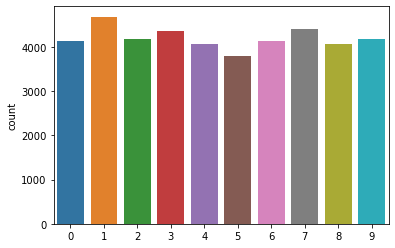

In [245]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
g = sns.countplot(y_KNN)

In [115]:
table = np.arange(1,12)
df = pd.DataFrame(table, columns = ["Neighbors"])
Train_accuracy = []
Val_accuracy = []
for k in table:
    KNN = KNeighborsClassifier(n_neighbors = k)
    test_knn = KNN.fit(X_train, y_train)
    val_pred = test_knn.predict(X_val)
    train_pred = test_knn.predict(X_train)
    Val_accuracy.append(metrics.accuracy_score(y_val, val_pred))
    Train_accuracy.append(metrics.accuracy_score(y_train, train_pred))
df['Train_accuracy'] = Train_accuracy
df['Val_accuracy'] = Val_accuracy
df

,Neighbors,Train_accuracy,Val_accuracy
0,1,1.000000,0.890476
1,2,0.947768,0.883452
2,3,0.947381,0.902738
3,4,0.940119,0.900119
4,5,0.937083,0.907381
5,6,0.933750,0.908571
6,7,0.931339,0.908333
7,8,0.929851,0.907619
8,9,0.927976,0.908452
9,10,0.926339,0.909167


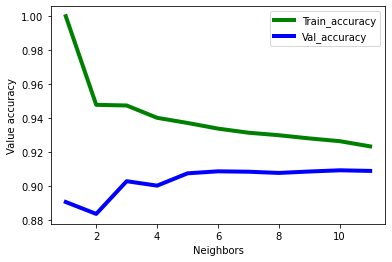

In [126]:
plt.plot('Neighbors', 'Train_accuracy', data = df, marker = '', color = 'g', linewidth = 4)
plt.plot('Neighbors', 'Val_accuracy', data = df, marker = '', color = 'b', linewidth = 4)
plt.xlabel('Neighbors')
plt.ylabel('Value accuracy')
plt.legend(loc = 'best')

In [135]:
print('Best params PCA & kNN Classifier')
df[df['Val_accuracy'] == df['Val_accuracy'].max()].iloc[[0]]

Best params PCA & kNN Classifier


,Neighbors,Train_accuracy,Val_accuracy
9,10,0.926339,0.909167


In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.99      0.98       909
           2       0.94      0.92      0.93       846
           3       0.92      0.86      0.89       937
           4       0.87      0.83      0.85       839
           5       0.89      0.91      0.90       702
           6       0.93      0.98      0.95       785
           7       0.93      0.92      0.93       893
           8       0.88      0.88      0.88       835
           9       0.80      0.83      0.81       838

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



In [141]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, val_pred))

[[786   0   4   0   2  11  11   0   1   1]
 [  0 902   3   0   0   0   3   1   0   0]
 [ 10   4 777   5   6   5  10  13  15   1]
 [  2   6   9 809   3  26   2   9  54  17]
 [  2   0   8   2 696   4  12   8   2 105]
 [  5   1   1  13   9 639  12   1  13   8]
 [  7   2   2   0   0   5 766   0   2   1]
 [  1  13  10   4   9   2   0 826   3  25]
 [  3   4   7  28   8  18   8   4 738  17]
 [  4   7   3  18  64   9   4  27   7 695]]


In [323]:
KNN = KNeighborsClassifier(n_neighbors = 10)
test_fit = KNN.fit(X_train, y_train)
test_pred = test_fit.predict(test_pca)

In [338]:
table_test = np.arange(1,28001)
rez = pd.DataFrame(table_test, columns = ["ImageId"])
rez['Label'] = pd.DataFrame(test_pred)
rez.head()

,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,2
4,5,7


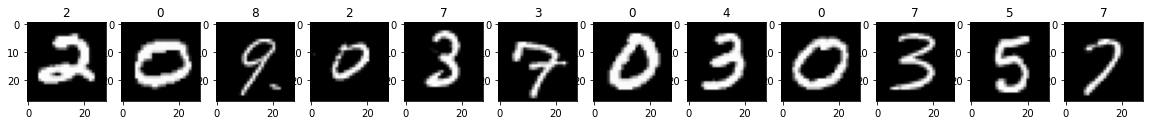

In [339]:
# my predict

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:12], 1):
    subplot = fig.add_subplot(1, 12, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % test_pred[i - 1]);

In [344]:
rez.to_csv("CVML_Digit_Recognizer_PCA&kNN.csv",index = False)

In [347]:
# for send
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(test_pred, 1):
        dst.write('%s,%s\n' % (i, p))

In [346]:
# !head submit.txt

In [ ]:
# My submission scored 0.44135

In [349]:
from IPython.display import Image

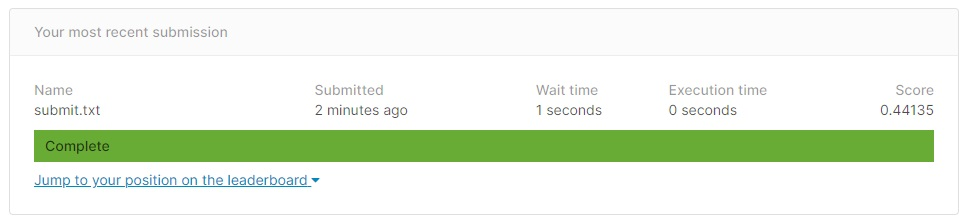

In [352]:
Image('Digit_Recognizer_Kaggle.jpg')